In [85]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

In [86]:
image = cv2.imread("desktop/chessboard.jpg")
image_copy = np.copy(image)

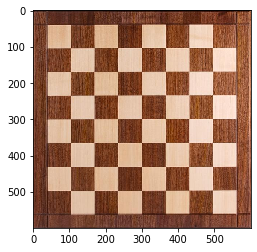

In [87]:
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [88]:
gray = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

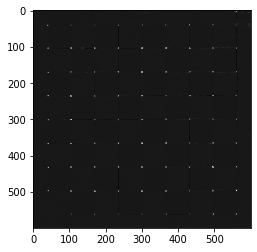

In [89]:
#Detect Corners
destination = cv2.cornerHarris(gray,2,3,0.04) #Destination

#Dilate corner image to enhance corner points
destination = cv2.dilate(destination,None)
plt.imshow(destination,cmap="gray")

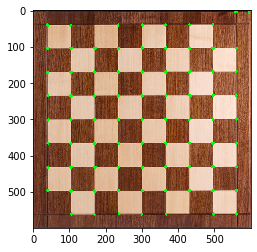

In [90]:
threshold = 0.1*destination.max()

#Create an image copy to draw corners on
corner_image = np.copy(image_copy)

#Iterate through all the corners and draw them on the image (if they pass threshold)
for j in range(0,destination.shape[0]):
    for i in range(0,destination.shape[1]):
        if(destination[j,i] > threshold):
            #İmage,center pt,radius,color,thickness
            cv2.circle(corner_image,(i,j),2,(0,255,0),1)
plt.imshow(corner_image)